Gradient Descent & Types of Gradient Descent
Gradient Descent is a fundamental optimization algorithm used to minimize the cost or loss function in machine learning models. It works by iteratively adjusting the model's parameters (weights and biases) in the direction that reduces the loss function. The goal is to find the optimal set of parameters that minimizes the loss, thereby improving the model's performance.

Key Concept:
Cost/Loss Function: A function that measures the error between the predicted output and the actual output. Gradient descent minimizes this function.
Gradient Descent Steps:
Initialize Parameters: Start with random initial values for the parameters.
Compute the Gradient: Calculate the gradient (partial derivatives) of the loss function with respect to each parameter. The gradient indicates the direction and magnitude of the steepest ascent.
Update Parameters: Adjust the parameters in the opposite direction of the gradient to move towards the minimum of the loss function.
Repeat: Iterate the process until the loss converges to a minimum value or until a pre-defined number of iterations is reached.
Types of Gradient Descent:
Batch Gradient Descent:

Description: Computes the gradient using the entire dataset.
Pros: Stable convergence since the gradient is averaged over all data points.
Cons: Computationally expensive and slow, especially for large datasets.
Use Case: Suitable for small datasets or when high precision is needed.
Stochastic Gradient Descent (SGD):

Description: Computes the gradient using a single randomly selected data point at each iteration.
Pros: Faster updates, leading to quicker convergence, and can escape local minima due to its randomness.
Cons: Convergence can be noisy and may oscillate around the minimum.
Use Case: Commonly used in online learning and large datasets.
Mini-Batch Gradient Descent:

Description: Computes the gradient using a small subset (mini-batch) of the dataset.
Pros: Combines the benefits of both Batch and Stochastic Gradient Descent. It provides a balance between convergence speed and stability.
Cons: Choosing the right mini-batch size can be challenging.
Use Case: Widely used in practice, especially with deep learning models.


In [33]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
tips = sns.load_dataset('tips')

In [34]:
tips.rename(columns={'total_bill': 'bill_amount'}, inplace=True)

In [35]:
X = tips.drop('bill_amount', axis=1)  # Drop the target column 'bill_amount'
y = tips['bill_amount']

In [36]:
X_encoded = pd.get_dummies(X, columns=['sex', 'smoker', 'day', 'time'])

In [37]:
y_normalized = (y - y.min()) / (y.max() - y.min())

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_normalized, test_size=0.2, random_state=42)

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    Dense(64, activation='relu'),  # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(1)  # Output layer: no activation function for regression
])


In [41]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [42]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.2950 - val_loss: 0.1293
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1400 - val_loss: 0.0594
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0580 - val_loss: 0.0448
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0312 - val_loss: 0.0475
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0267 - val_loss: 0.0482
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0222 - val_loss: 0.0426
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0228 - val_loss: 0.0354
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0154 - val_loss: 0.0307
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0138 - val_loss: 0.0281
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0129 - val_loss: 0.0270
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0150 - val_loss: 0.0266
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0111 - val_loss: 0.0262
Ep

In [43]:
loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.0311  
Test Loss: 0.031842172145843506


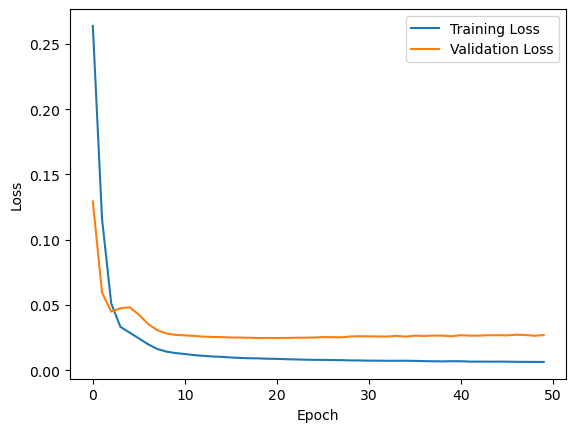

In [44]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()